<a href="https://colab.research.google.com/github/EddyKubwimana/83082025_Churning_Customers/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import seaborn as sns
from matplotlib  import  pyplot as plt

# Data loading

In [4]:
customerdata = pd.read_csv("/content/drive/MyDrive/IntroAi/CustomerChurn_dataset.csv")

-----INSPECTING DATA----

In [5]:
customerdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Separation of numerical and categorical data

In [6]:
categoricaldata = customerdata.select_dtypes(include = ["object"])

In [9]:
categoricaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [8]:
numericaldata = customerdata.select_dtypes(exclude = ["object"])

In [10]:
numericaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


# Exploratory Data Analysis

Numerical data

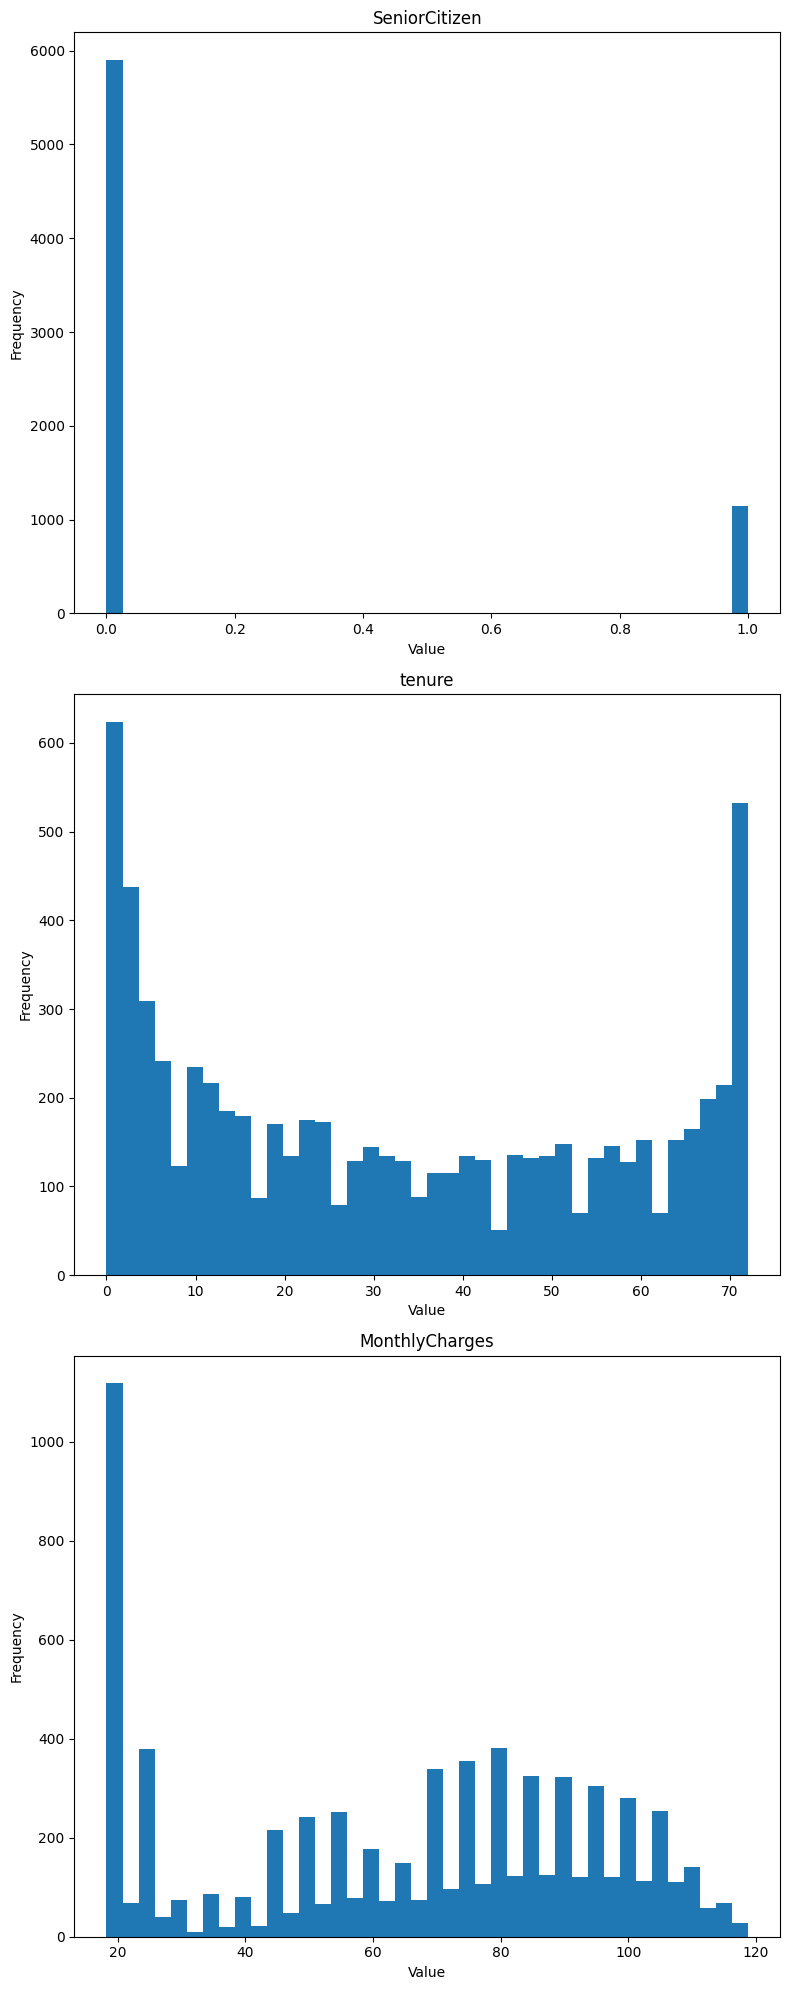

In [28]:
num_columns = len(numericaldata.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 20))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].hist(numericaldata[column_name], bins=40)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

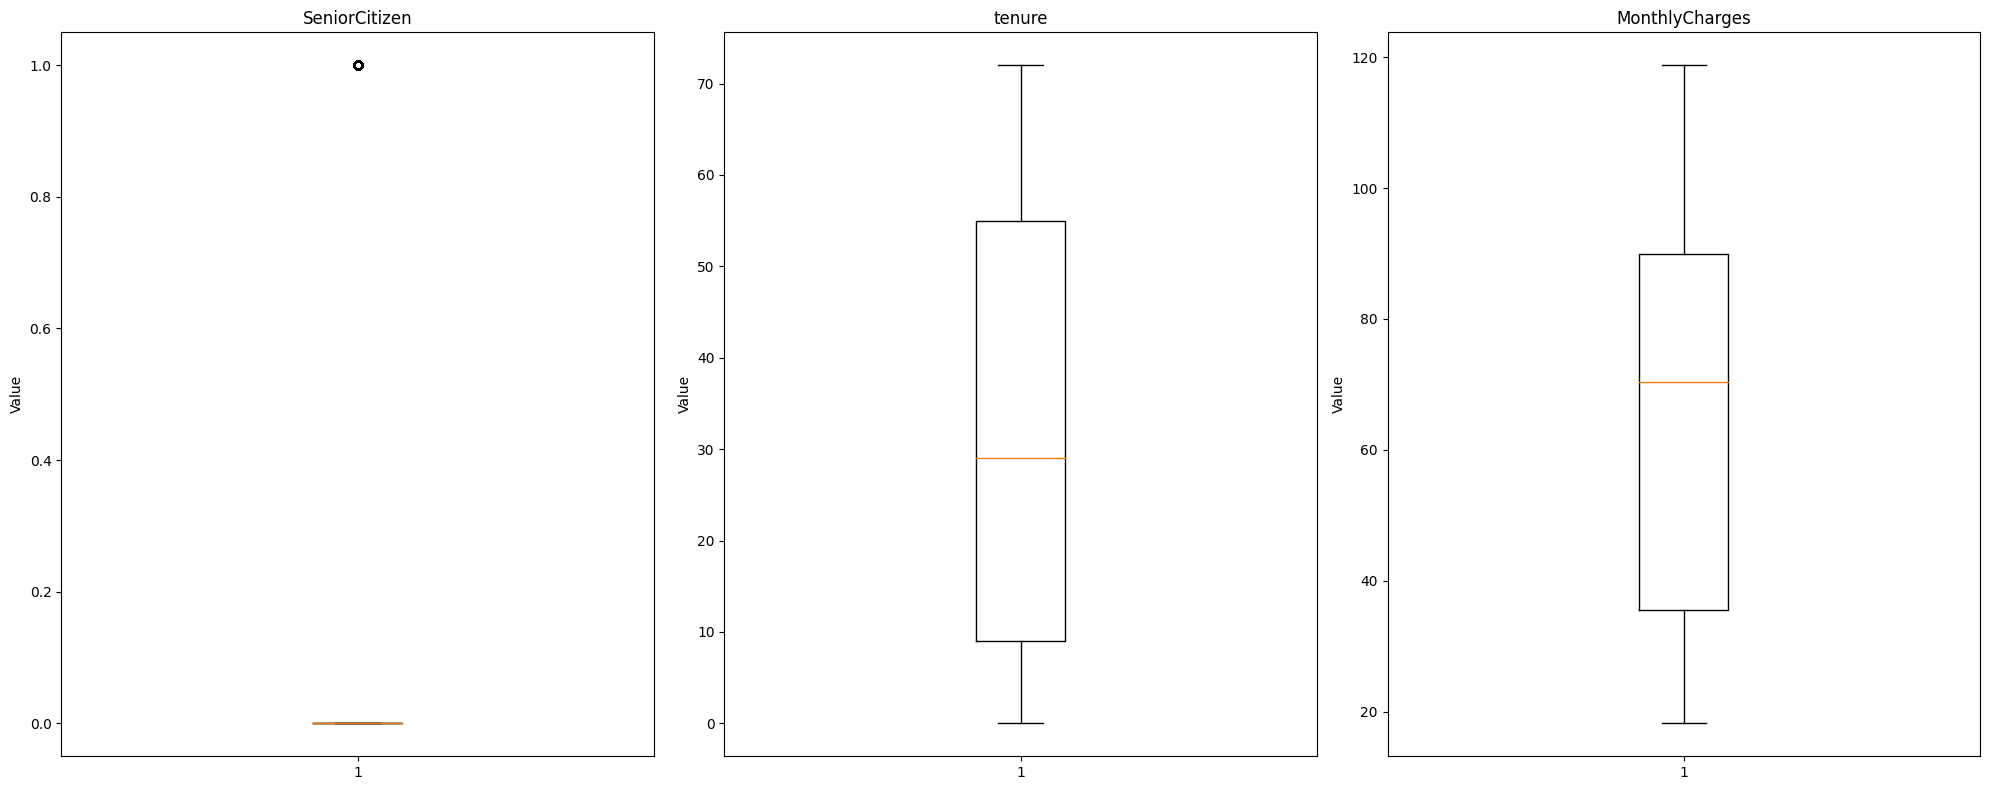

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i in range(num_columns):
    column_name = numericaldata.columns[i]
    axes[i].boxplot(numericaldata[column_name])
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


 categorical data

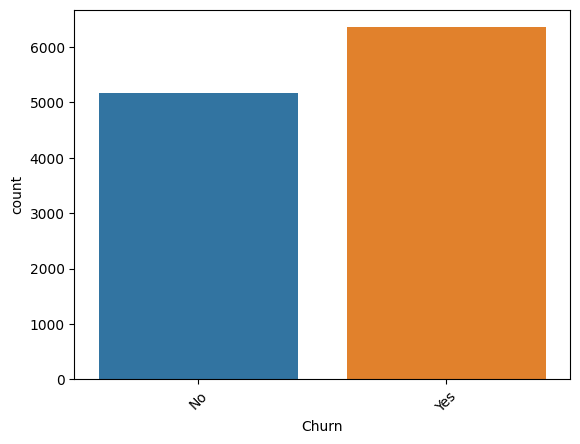

In [56]:
for i in categoricaldata.columns:
  sns.countplot(x = categoricaldata[i],data=categoricaldata)
  plt.xticks(rotation=45)

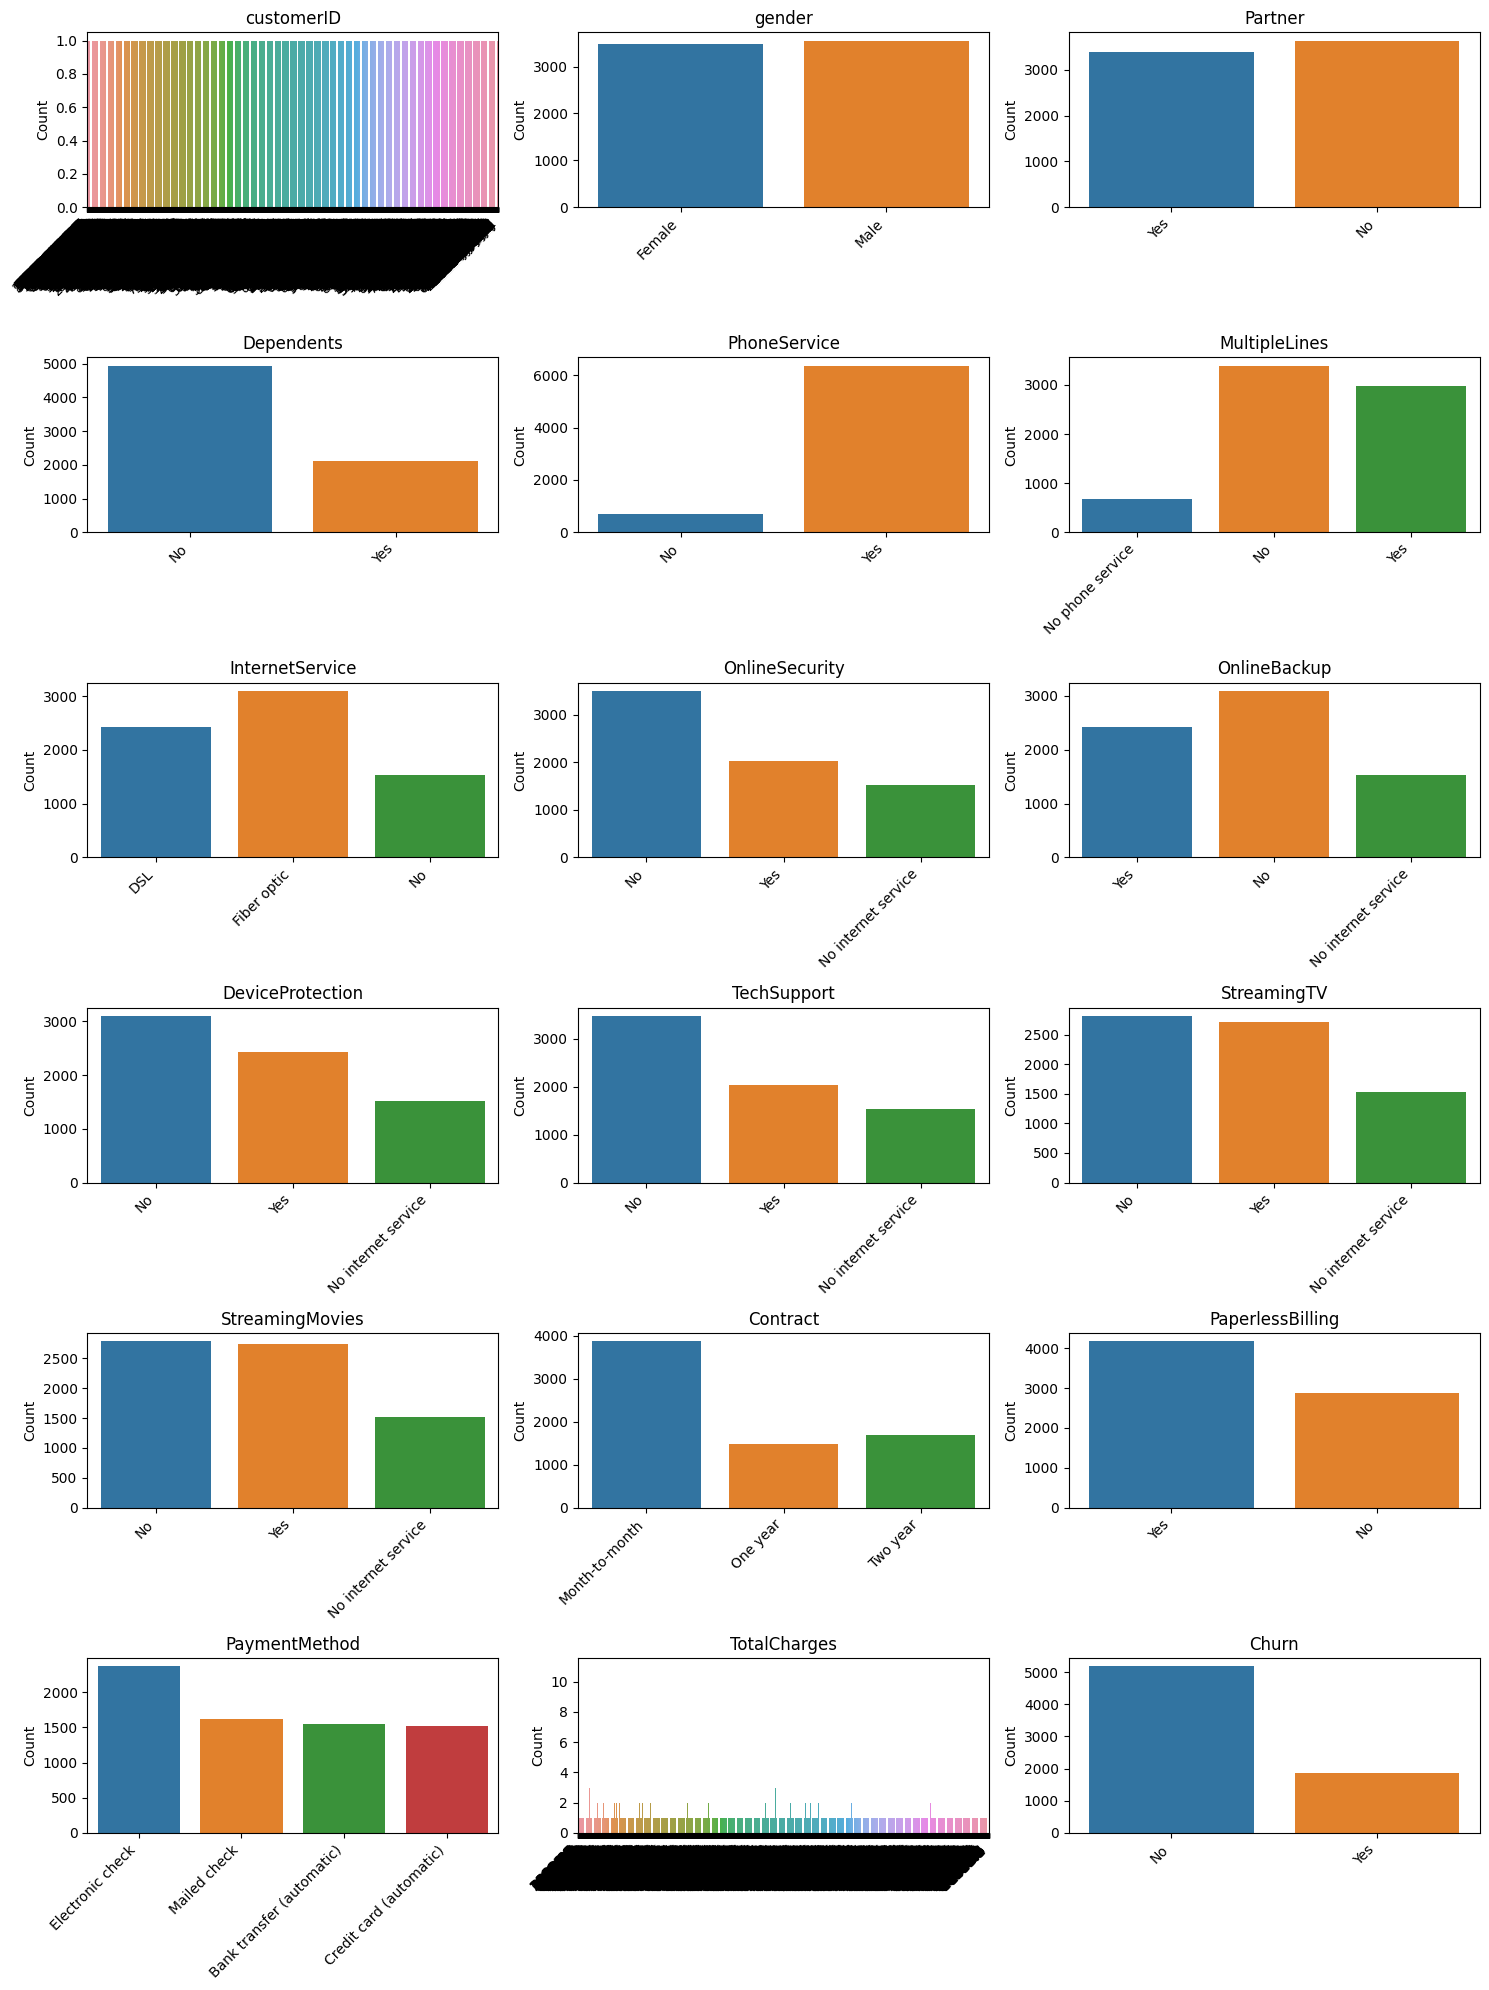

In [57]:

num_rows = 6
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(categoricaldata.columns[:18]):
    ax = axes[i]
    sns.countplot(x=column, data=categoricaldata, ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Remove any unused subplots
for i in range(18, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
